In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('base_rf.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
df.loc[:,'y'] = df.y.replace('no',0).replace('yes',1)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [7]:
X = df.drop('y',axis=1)
y = df.y

In [8]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=.3)

In [9]:
X_tr.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [16]:
from sklearn.preprocessing import OrdinalEncoder

X_tr_o = X_tr.copy()
X_ts_o = X_ts.copy()

encoders = {}
for col,dtype in X_tr_d.dtypes.items():
    encoders[col] = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    X_tr_o.loc[:,col] = encoders[col].fit_transform(X_tr_o[[col]])
    X_ts_o.loc[:,col] = encoders[col].transform(X_ts_o[[col]])
    
X_tr_o

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
16124,10.0,10.0,2.0,6.0,0.0,2.0,0.0,0.0,3.0,3.0,0.0,24.0,0.0,1.0,9.0,17.0,6.0,297.0,10.0
8493,25.0,9.0,2.0,3.0,0.0,2.0,0.0,1.0,4.0,4.0,0.0,24.0,0.0,1.0,9.0,23.0,8.0,283.0,10.0
32747,19.0,0.0,2.0,5.0,0.0,2.0,0.0,0.0,6.0,1.0,2.0,24.0,1.0,0.0,3.0,8.0,4.0,204.0,6.0
14249,17.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,3.0,1.0,2.0,24.0,0.0,1.0,9.0,17.0,6.0,298.0,10.0
13898,33.0,9.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,24.0,0.0,1.0,9.0,17.0,6.0,299.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22595,31.0,9.0,1.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,24.0,0.0,1.0,9.0,13.0,17.0,300.0,10.0
2064,22.0,0.0,1.0,6.0,0.0,0.0,0.0,1.0,6.0,1.0,5.0,24.0,0.0,1.0,8.0,18.0,16.0,279.0,8.0
30285,29.0,7.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,24.0,0.0,1.0,3.0,10.0,3.0,210.0,6.0
11369,13.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,4.0,0.0,10.0,24.0,0.0,1.0,9.0,23.0,8.0,295.0,10.0


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['gini','entropy'],
    'max_depth': [3,5,7,9,11],
}

rf = GridSearchCV(
    RandomForestClassifier(n_estimators=500, random_state=61658, n_jobs=2),
    params,
    cv=5,
    scoring='roc_auc',
    verbose=10,
)
rf.fit(X_tr_o,y_tr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START criterion=gini, max_depth=3................................
[CV 1/5; 1/10] END ..............criterion=gini, max_depth=3; total time=   6.0s
[CV 2/5; 1/10] START criterion=gini, max_depth=3................................
[CV 2/5; 1/10] END ..............criterion=gini, max_depth=3; total time=   2.9s
[CV 3/5; 1/10] START criterion=gini, max_depth=3................................
[CV 3/5; 1/10] END ..............criterion=gini, max_depth=3; total time=   2.9s
[CV 4/5; 1/10] START criterion=gini, max_depth=3................................
[CV 4/5; 1/10] END ..............criterion=gini, max_depth=3; total time=   3.3s
[CV 5/5; 1/10] START criterion=gini, max_depth=3................................
[CV 5/5; 1/10] END ..............criterion=gini, max_depth=3; total time=   3.5s
[CV 1/5; 2/10] START criterion=gini, max_depth=5................................
[CV 1/5; 2/10] END ..............criterion=gini,

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=500, n_jobs=2,
                                              random_state=61658),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11]},
             scoring='roc_auc', verbose=10)

In [18]:
rf.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [19]:
from sklearn.metrics import roc_auc_score

preds = rf.predict_proba(X_ts_o)[:,1]

roc_auc_score(y_ts,preds)

0.7976304923104458

In [20]:
rf.best_estimator_.feature_importances_

array([0.07571046, 0.03798759, 0.01941001, 0.03533877, 0.01000487,
       0.01451771, 0.0127486 , 0.02384001, 0.03529095, 0.03568618,
       0.03882661, 0.06601998, 0.01905601, 0.06030315, 0.08940601,
       0.04355637, 0.05483964, 0.16815097, 0.15930611])

In [22]:
imps = rf.best_estimator_.feature_importances_
cols = X_tr_d.columns
order= np.argsort(imps)[::-1]

for col,imp in zip(cols[order],imps[order]):
    print(f'{col:30s} {imp:.2f}')

euribor3m                      0.17
nr.employed                    0.16
emp.var.rate                   0.09
age                            0.08
pdays                          0.07
poutcome                       0.06
cons.conf.idx                  0.05
cons.price.idx                 0.04
campaign                       0.04
job                            0.04
day_of_week                    0.04
education                      0.04
month                          0.04
contact                        0.02
marital                        0.02
previous                       0.02
housing                        0.01
loan                           0.01
default                        0.01


In [23]:
preds.min()

0.01013130721538688

In [24]:
preds.max()

0.9332226886787476

(array([1.78212291, 6.0551676 , 2.47067039, 1.15432961, 0.40502793,
        0.44553073, 0.54678771, 1.03282123, 0.91131285, 1.2150838 ,
        1.62011173, 1.39734637, 1.11382682, 0.95181564, 1.09357542,
        0.78980447, 0.78980447, 0.72905028, 0.54678771, 0.52653631,
        0.66829609, 0.66829609, 0.72905028, 0.46578212, 0.44553073,
        0.28351955, 0.14175978, 0.0202514 , 0.        ]),
 array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
        0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
        0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
        0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
        0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
        0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ]),
 <BarContainer object of 29 artists>)

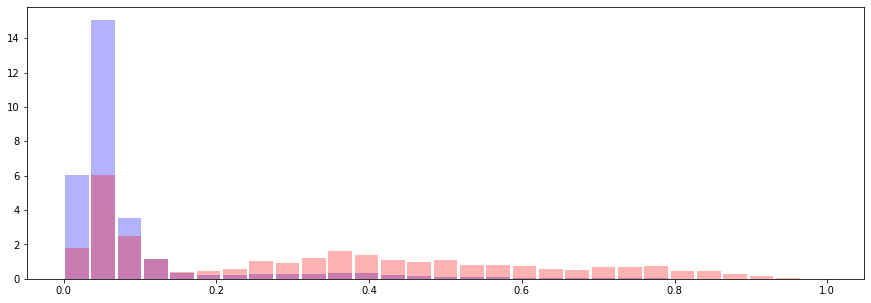

In [25]:
plt.figure(figsize=(15,5))
plt.hist(preds[y_ts==0], bins=np.linspace(0,1,30), density=True, color='b', alpha=.3, rwidth=.9)
plt.hist(preds[y_ts==1], bins=np.linspace(0,1,30), density=True, color='r', alpha=.3, rwidth=.9)

In [26]:
preds.min(),preds.max()

(0.01013130721538688, 0.9332226886787476)